### This notebook is to illustrate feature selection done by each model. Data needed to be preprocessed first before feature selection can be done. The feature name should match the bar chart.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

np.random.seed(5)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("trainoutlier.csv")

In [3]:
df.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876.0,408.0,24.583,397.410526,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,0.550,0.023,0.107,0.062000,0.310,0.166,0.100,0.083326,0.239,0.342,11.022908,5.752414,21.715153,217.0,3421.828611,2508.303867,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577.0
1,10224.0,1166.0,28.346,3.000000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,0.545,0.040,0.324,0.183375,0.253,0.102,0.066,0.070000,0.200,0.148,9.904099,5.752414,18.260000,181.0,2009.000000,1690.000000,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.389872,14.482893,3.158246,844.0
2,27023.0,2927.0,21.641,9.000000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,0.508,0.063,0.129,0.032000,0.296,0.215,0.087,0.070000,0.187,0.258,11.011502,5.752414,19.940000,234.0,4650.000000,1350.000000,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700.0
3,8735.0,1039.0,23.110,0.000000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,0.545,0.038,0.207,0.084000,0.255,0.182,0.104,0.081000,0.169,0.274,12.845770,5.752414,30.310000,231.0,4420.000000,1749.000000,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592.0
4,3681.0,365.0,21.985,2.000000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,0.474,0.034,0.177,0.075000,0.324,0.118,0.113,0.083326,0.178,0.340,11.565750,5.752414,21.715153,270.0,3421.828611,1249.000000,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444.0


### Drop Multicollinearity features

In [4]:
df1 = df.drop(labels=['renter_occupied_households','evictions'],axis=1)

In [5]:
df1.head()

,population,pct_renter_occupied,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876.0,24.583,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,0.550,0.023,0.107,0.062000,0.310,0.166,0.100,0.083326,0.239,0.342,11.022908,5.752414,21.715153,217.0,3421.828611,2508.303867,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577.0
1,10224.0,28.346,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,0.545,0.040,0.324,0.183375,0.253,0.102,0.066,0.070000,0.200,0.148,9.904099,5.752414,18.260000,181.0,2009.000000,1690.000000,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.389872,14.482893,3.158246,844.0
2,27023.0,21.641,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,0.508,0.063,0.129,0.032000,0.296,0.215,0.087,0.070000,0.187,0.258,11.011502,5.752414,19.940000,234.0,4650.000000,1350.000000,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700.0
3,8735.0,23.110,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,0.545,0.038,0.207,0.084000,0.255,0.182,0.104,0.081000,0.169,0.274,12.845770,5.752414,30.310000,231.0,4420.000000,1749.000000,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592.0
4,3681.0,21.985,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,0.474,0.034,0.177,0.075000,0.324,0.118,0.113,0.083326,0.178,0.340,11.565750,5.752414,21.715153,270.0,3421.828611,1249.000000,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444.0


In [6]:
df1.shape

(1562, 38)

In [7]:
#df1.to_csv("modelfs.csv",index=False)

In [8]:
X = df1.iloc[:,0:37]
y = df1.iloc[:,37]

In [9]:
X.shape, y.shape

((1562, 37), (1562,))

In [10]:
X.values

array([[3.87600000e+03, 2.45830000e+01, 1.83800000e+01, ...,
        1.99598796e-01, 1.00089824e+01, 9.75234185e+00],
       [1.02240000e+04, 2.83460000e+01, 2.66940000e+01, ...,
        3.89871642e-01, 1.44828927e+01, 3.15824596e+00],
       [2.70230000e+04, 2.16410000e+01, 3.10280000e+01, ...,
        2.19560878e-01, 9.62034648e+00, 1.08735717e+01],
       ...,
       [7.72240000e+04, 1.89280000e+01, 2.88270000e+01, ...,
        2.68195414e-01, 9.02928647e+00, 8.84661304e+00],
       [4.69800000e+03, 2.01070000e+01, 3.94646250e+01, ...,
        1.40000000e-01, 8.44521438e+00, 9.74447813e+00],
       [1.55224625e+05, 3.77890000e+01, 3.06870000e+01, ...,
        3.59281437e-01, 1.39446283e+01, 6.17315807e+00]])

In [11]:
y.values

array([577., 844., 700., ..., 754., 640., 976.])

### Decision Tree Regressor

In [12]:
model = DecisionTreeRegressor(random_state=5)

In [13]:
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [14]:
model.feature_importances_

array([0.08626306, 0.00902273, 0.01814865, 0.01484667, 0.00869968,
       0.01809616, 0.00579696, 0.36954101, 0.00359389, 0.02910855,
       0.00974269, 0.04714002, 0.00733382, 0.01501719, 0.00369356,
       0.00701424, 0.02311986, 0.01128466, 0.00638229, 0.00285089,
       0.00428992, 0.01355827, 0.00720754, 0.        , 0.00491429,
       0.00902195, 0.00795369, 0.00580239, 0.00212567, 0.00328687,
       0.02257676, 0.0170309 , 0.07228535, 0.00997122, 0.08358547,
       0.00654265, 0.03315049])

In [15]:
X.columns

Index(['population', 'pct_renter_occupied', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k', 'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 'birth_rate_per_1k', 'death_rate_per_1k'], dtype='object')

In [16]:
featureplot = pd.Series(model.feature_importances_)

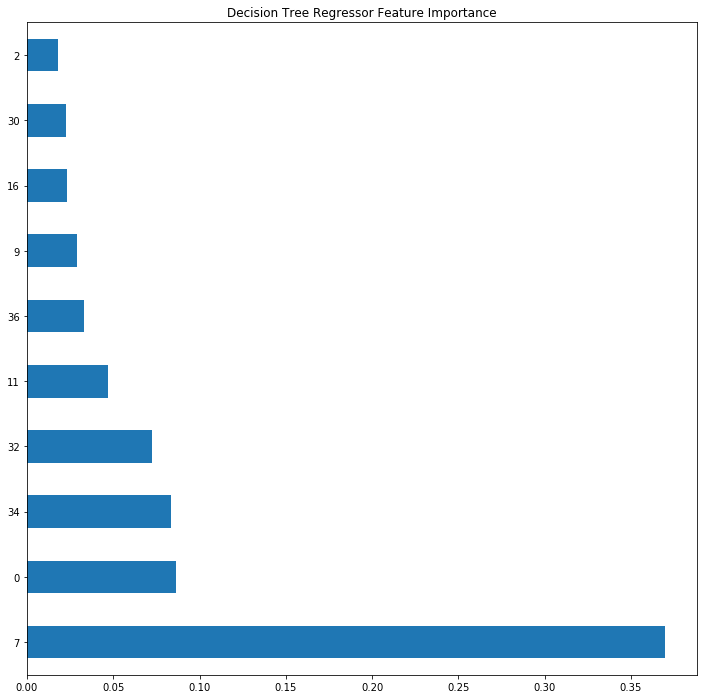

In [17]:
fig = plt.figure(figsize=(12,12))
plt.title("Decision Tree Regressor Feature Importance")
featureplot.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
features = pd.DataFrame(model.feature_importances_,columns=['Score'])

In [19]:
features

,Score
0,0.086263
1,0.009023
2,0.018149
3,0.014847
4,0.008700
5,0.018096
6,0.005797
7,0.369541
8,0.003594
9,0.029109


In [20]:
colname = pd.DataFrame(X.columns,columns=['Name'])

In [21]:
colname

,Name
0,population
1,pct_renter_occupied
2,rent_burden
3,pct_white
4,pct_af_am
5,pct_hispanic
6,pct_am_ind
7,pct_asian
8,pct_nh_pi
9,pct_multiple


In [22]:
combine = pd.concat([colname,features],axis=1)

In [23]:
combine.sort_values(by='Score')

,Name,Score
23,homicides_per_100k,0.000000
28,pct_female,0.002126
19,pct_low_birthweight,0.002851
29,pct_below_18_years_of_age,0.003287
8,pct_nh_pi,0.003594
14,pct_uninsured_adults,0.003694
20,pct_excessive_drinking,0.004290
24,motor_vehicle_crash_deaths_per_100k,0.004914
6,pct_am_ind,0.005797
27,pop_per_primary_care_physician,0.005802


### Result: pct_asian, population, pct_adults_bachelors_or_higher, pct_adults_with_high_school_diploma, poverty_rate, death_rate_per_1k, pct_multiple, pct_adult_obesity, pct_aged_65_years_and_older, rent_burden

### Bagging Regressor

In [24]:
model2 = BaggingRegressor(n_estimators=400,n_jobs=-1,verbose=1,random_state=5)

In [25]:
model2.fit(X,y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.1s finished


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=400, n_jobs=-1,
                 oob_score=False, random_state=5, verbose=1, warm_start=False)

In [26]:
model2.get_params

<bound method BaseEstimator.get_params of BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=400, n_jobs=-1,
                 oob_score=False, random_state=5, verbose=1, warm_start=False)>

### Random Forest Regressor

In [27]:
model3 = RandomForestRegressor(n_estimators=400,n_jobs=-1,random_state=5,verbose=1)

In [28]:
model3.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.7s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=-1, oob_score=False,
                      random_state=5, verbose=1, warm_start=False)

In [29]:
model3.feature_importances_

array([0.11884412, 0.00895126, 0.01350262, 0.01987075, 0.00706956,
       0.02630564, 0.00632324, 0.18413954, 0.00404524, 0.01874383,
       0.01536025, 0.03850375, 0.00716214, 0.01232346, 0.0053862 ,
       0.00850134, 0.0203552 , 0.00644778, 0.00660566, 0.00301841,
       0.005164  , 0.02079038, 0.00848883, 0.        , 0.00587739,
       0.00849062, 0.00714925, 0.00537059, 0.0049677 , 0.00633371,
       0.02989154, 0.00828591, 0.03847584, 0.00829104, 0.23218681,
       0.00825432, 0.07052207])

In [30]:
featureplot3 = pd.Series(model3.feature_importances_)

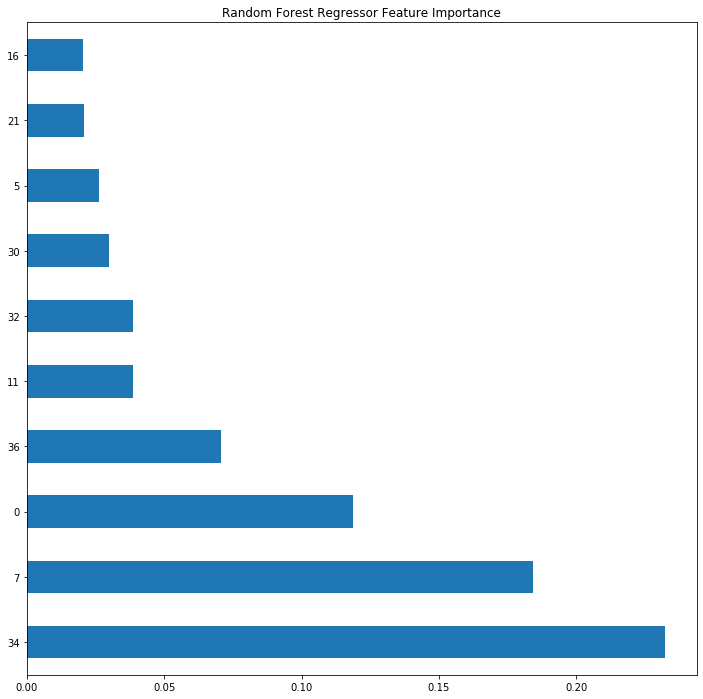

In [31]:
fig = plt.figure(figsize=(12,12))
plt.title("Random Forest Regressor Feature Importance")
featureplot3.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
features3 = pd.DataFrame(model3.feature_importances_,columns=['Score'])

In [33]:
features3

,Score
0,0.118844
1,0.008951
2,0.013503
3,0.019871
4,0.007070
5,0.026306
6,0.006323
7,0.184140
8,0.004045
9,0.018744


In [34]:
colname3 = pd.DataFrame(X.columns,columns=['Name'])

In [35]:
colname3

,Name
0,population
1,pct_renter_occupied
2,rent_burden
3,pct_white
4,pct_af_am
5,pct_hispanic
6,pct_am_ind
7,pct_asian
8,pct_nh_pi
9,pct_multiple


In [36]:
combine3 = pd.concat([colname3,features3],axis=1)

In [37]:
combine3.sort_values(by='Score')

,Name,Score
23,homicides_per_100k,0.000000
19,pct_low_birthweight,0.003018
8,pct_nh_pi,0.004045
28,pct_female,0.004968
20,pct_excessive_drinking,0.005164
27,pop_per_primary_care_physician,0.005371
14,pct_uninsured_adults,0.005386
24,motor_vehicle_crash_deaths_per_100k,0.005877
6,pct_am_ind,0.006323
29,pct_below_18_years_of_age,0.006334


### Result: pct_adults_bachelors_or_higher, pct_asian, population, death_rate_per_1k, poverty_rate, pct_adults_with_high_school_diploma, pct_aged_65_years_and_older, pct_hispanic, pct_physical_inactivity, pct_adult_obesity

### Extra Trees Regressor

In [38]:
model4 = ExtraTreesRegressor(n_estimators=400,n_jobs=-1,random_state=5,verbose=1)

In [39]:
model4.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.2s finished


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=-1, oob_score=False,
                    random_state=5, verbose=1, warm_start=False)

In [40]:
model4.feature_importances_

array([0.17551312, 0.01159486, 0.01430486, 0.01419495, 0.01141656,
       0.01911879, 0.00830642, 0.17119736, 0.00923556, 0.02136342,
       0.01642017, 0.03040542, 0.00907395, 0.01161754, 0.00695768,
       0.00917169, 0.02339782, 0.00982087, 0.01055833, 0.00566896,
       0.00730815, 0.03062751, 0.0093648 , 0.        , 0.00747861,
       0.01144095, 0.00804853, 0.00713874, 0.00801604, 0.00813253,
       0.02500964, 0.00820393, 0.03743143, 0.00931106, 0.15966991,
       0.00920245, 0.06427737])

In [41]:
features4 = pd.Series(model4.feature_importances_)

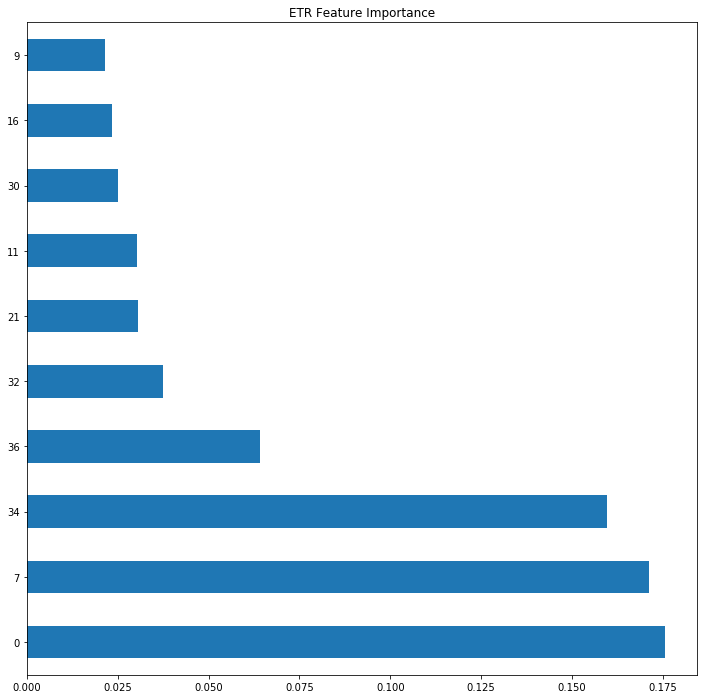

In [42]:
fig = plt.figure(figsize=(12,12))
plt.title("ETR Feature Importance")
features4.nlargest(10).plot(kind='barh')
plt.show()

### Result: motor_vehicle_crash_deaths_per_100k, pct_aged_65_years_and_older, pct_adult_obesity, poverty_rate, population, pct_physical_inactivity, death_rate_per_1k, pct_adults_with_high_school_diploma, pct_asian, pct_adults_bachelors_or_higher

### Adaboost

In [43]:
model5 = AdaBoostRegressor(base_estimator=model,n_estimators=400,random_state=5)

In [44]:
model5.fit(X,y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=5,
                                                       splitter='best'),
                  

In [45]:
model5.feature_importances_

array([0.1030531 , 0.01096409, 0.01925066, 0.0286522 , 0.01090062,
       0.0183621 , 0.00681674, 0.19648475, 0.00468796, 0.03424841,
       0.01397153, 0.05644465, 0.01108199, 0.01648488, 0.0078537 ,
       0.01005623, 0.01668034, 0.00670964, 0.01108844, 0.00473751,
       0.00642152, 0.04382917, 0.01014823, 0.        , 0.00741163,
       0.01048809, 0.00927287, 0.00691308, 0.00676539, 0.00727061,
       0.0381556 , 0.00901002, 0.04345568, 0.00998749, 0.11626758,
       0.01123547, 0.07483802])

In [46]:
features5 = pd.Series(model5.feature_importances_)

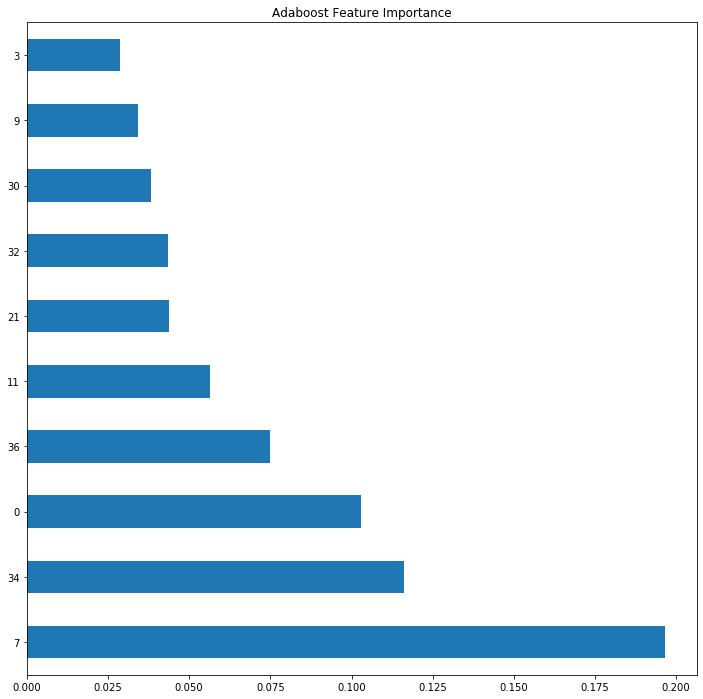

In [47]:
fig = plt.figure(figsize=(12,12))
plt.title("Adaboost Feature Importance")
features5.nlargest(10).plot(kind='barh')
plt.show()

### Result: motor_vehicle_crash_deaths_per_100k, pct_aged_65_years_and_older, pct_white, pct_adults_with_high_school_diploma, pct_adult_obesity, death_rate_per_1k, population, poverty_rate, pct_adults_bachelors_or_higher, pct_asian

### GradientBoostingRegressor

In [48]:
model6 = GradientBoostingRegressor(n_estimators=400,max_depth=6,random_state=5,max_features="auto",verbose=1)

In [49]:
model6.fit(X,y)

      Iter       Train Loss   Remaining Time 
         1       22016.1414           12.47s
         2       18786.5172            9.33s
         3       16148.9538           10.34s
         4       13921.3885            9.28s
         5       11981.8519            9.87s
         6       10402.5555            9.23s
         7        9089.5283            9.65s
         8        7969.7058            9.19s
         9        7035.4664            9.50s
        10        6222.3045            9.75s
        20        2395.3068            9.20s
        30        1292.9281            8.86s
        40         806.4207            8.58s
        50         545.8299            8.31s
        60         428.9386            8.06s
        70         339.6771            7.88s
        80         267.6727            7.63s
        90         221.2240            7.43s
       100         171.5531            7.22s
       200          21.6124            4.76s
       300           2.3319            2.36s
       40

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [50]:
model6.feature_importances_

array([0.09681975, 0.00798123, 0.02063785, 0.0210665 , 0.00589676,
       0.02656311, 0.00569455, 0.27319524, 0.00310713, 0.01791179,
       0.01296519, 0.05797245, 0.00816518, 0.01359184, 0.00706525,
       0.00807002, 0.01965282, 0.00781696, 0.00483735, 0.0035933 ,
       0.00404522, 0.01259234, 0.00972565, 0.        , 0.004497  ,
       0.00649365, 0.00650664, 0.004684  , 0.00385656, 0.00293568,
       0.03121867, 0.00863421, 0.05955806, 0.00712023, 0.15670307,
       0.00691975, 0.051905  ])

In [51]:
features6 = pd.Series(model6.feature_importances_)

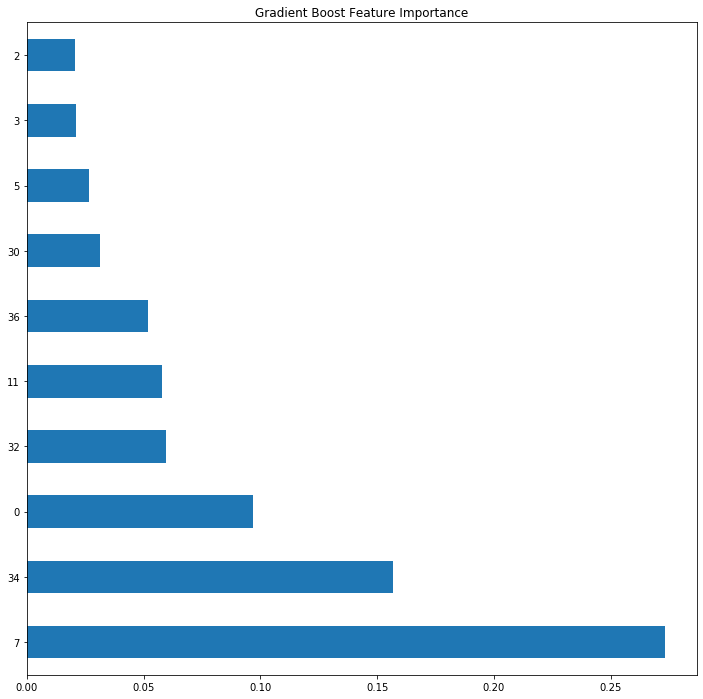

In [52]:
fig = plt.figure(figsize=(12,12))
plt.title("Gradient Boost Feature Importance")
features6.nlargest(10).plot(kind='barh')
plt.show()

### Result: rent_burden, pct_aged_65_years_and_older, pct_hispanic, pct_adults_with_high_school_diploma, pct_adult_obesity, death_rate_per_1k, poverty_rate, population, pct_asian, pct_adults_bachelors_or_higher